In [1]:
#Mount google drive

#from google.colab import drive
#drive.mount("/content/drive")

In [2]:
#pip install xgboost

In [3]:
# Load libraries and import csv as a dataframe

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier  
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

le = LabelEncoder()

filepath = "C:/Users/Anamay Deshpande/MIS_637_DA_ML/Project/Motor_Vehicle_Collisions_org.csv"
df = pd.read_csv(filepath)

df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,09-11-2021,02:39,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,03/26/2022,11:45,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,06/29/2022,06:55,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
3,09-11-2021,09:35,BROOKLYN,11208.0,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
4,12/14/2021,08:13,BROOKLYN,11233.0,SARATOGA AVENUE,DECATUR STREET,0.0,0.0,0,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN


In [4]:
df.shape

(1048575, 19)

**Data Exploration and Data Transformation**

In [5]:
#Number of empty cells per column of the dataframe
df.isna().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          376647
ZIP CODE                         376831
ON STREET NAME                   257005
CROSS STREET NAME                542965
NUMBER OF PERSONS INJURED            17
NUMBER OF PERSONS KILLED             30
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      3747
CONTRIBUTING FACTOR VEHICLE 2    178415
COLLISION_ID                          0
VEHICLE TYPE CODE 1                8665
VEHICLE TYPE CODE 2              248906
dtype: int64

In [6]:
#Creating another dataframe which does not contain the empty cells of the original df
df2 = df
df2 = df2.dropna()
#df2.head()

In [7]:
df2.shape

(329689, 19)

In [8]:
#Creating df3 to not include any cells of a specific column to have the value "unspecified" since it is of no help to us
df3 = df2.loc[df2['CONTRIBUTING FACTOR VEHICLE 1'] == "Unspecified"]
df3.shape

(59566, 19)

In [9]:
df3 = df2[~df2['CONTRIBUTING FACTOR VEHICLE 1'].str.contains("Unspecified")]
df3.shape

(270123, 19)

In [10]:
df3 = df2[~df2['CONTRIBUTING FACTOR VEHICLE 2'].str.contains("Unspecified")]
df3.shape

(61933, 19)

In [11]:
#Creating df4 and converting the date to a standard year-month-date format
df4 = df3.copy()

In [12]:
df4["CRASH DATE"] = pd.to_datetime(df4["CRASH DATE"]).dt.strftime("%Y-%m-%d")

In [13]:
#Sort values of df4 by date in ascending order
df4 = df4.sort_values(by='CRASH DATE', ascending=True)
df4.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
970841,2016-03-23,18:40,MANHATTAN,10017.0,WEST 47 STREET,5 AVENUE,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Passing Too Closely,3408110,4 dr sedan,DELV.
970144,2016-04-25,10:45,QUEENS,11433.0,LIBERTY AVENUE,173 STREET,1.0,0.0,0,0,0,0,1,0,Other Vehicular,Other Vehicular,3423040,4 dr sedan,4 dr sedan
1046492,2016-08-19,00:00,BROOKLYN,11207.0,JAMAICA AVENUE,PENNSYLVANIA AVENUE,0.0,0.0,0,0,0,0,0,0,Failure to Keep Right,Following Too Closely,3503188,Sedan,Station Wagon/Sport Utility Vehicle
1040412,2016-08-19,10:20,BRONX,10458.0,DECATUR AVENUE,EAST FORDHAM ROAD,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,3503516,Sedan,Sedan
1041111,2016-08-19,00:03,QUEENS,11370.0,23 AVENUE,80 STREET,0.0,0.0,0,0,0,0,0,0,Reaction to Uninvolved Vehicle,Following Too Closely,3503418,Sedan,Taxi


In [14]:
df4.shape

(61933, 19)

In [15]:
df4['COLLISION_ID'].nunique()

61933

In [16]:
#Correlation matrix for all columns of df4
df4.corr()

,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
ZIP CODE,1.000000,0.101669,0.007259,-0.000107,0.003549,-0.021601,-0.000012,0.109232,0.007939,0.071393
NUMBER OF PERSONS INJURED,0.101669,1.000000,0.028286,0.095572,0.006163,0.197201,-0.001237,0.950682,0.035004,0.171487
NUMBER OF PERSONS KILLED,0.007259,0.028286,1.000000,0.021038,0.279953,-0.000885,0.442665,0.028029,0.804335,0.013868
NUMBER OF PEDESTRIANS INJURED,-0.000107,0.095572,0.021038,1.000000,0.077855,-0.002922,-0.000447,0.033969,-0.000615,0.009671
NUMBER OF PEDESTRIANS KILLED,0.003549,0.006163,0.279953,0.077855,1.000000,0.006754,-0.000102,-0.000661,-0.000141,0.005008
NUMBER OF CYCLIST INJURED,-0.021601,0.197201,-0.000885,-0.002922,0.006754,1.000000,0.002465,-0.089282,-0.004145,0.121358
NUMBER OF CYCLIST KILLED,-0.000012,-0.001237,0.442665,-0.000447,-0.000102,0.002465,1.000000,-0.001847,-0.000222,0.000113
NUMBER OF MOTORIST INJURED,0.109232,0.950682,0.028029,0.033969,-0.000661,-0.089282,-0.001847,1.000000,0.037200,0.124586
NUMBER OF MOTORIST KILLED,0.007939,0.035004,0.804335,-0.000615,-0.000141,-0.004145,-0.000222,0.037200,1.000000,0.010359
COLLISION_ID,0.071393,0.171487,0.013868,0.009671,0.005008,0.121358,0.000113,0.124586,0.010359,1.000000


**Data Preperation and Modeling**

In [114]:
#creating another dataframe which contains only those columns that will be useful when fed to a machine learning model for prediction
df_model = df4[['CRASH DATE', 'CRASH TIME', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'CONTRIBUTING FACTOR VEHICLE 1', 
                'CONTRIBUTING FACTOR VEHICLE 2', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 
                'NUMBER OF PEDESTRIANS INJURED', 'BOROUGH']].copy()
df_model.head()

,CRASH DATE,CRASH TIME,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,NUMBER OF PERSONS KILLED,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF PEDESTRIANS INJURED,BOROUGH
970841,2016-03-23,18:40,4 dr sedan,DELV.,Passing Too Closely,Passing Too Closely,0.0,0.0,0,0,MANHATTAN
970144,2016-04-25,10:45,4 dr sedan,4 dr sedan,Other Vehicular,Other Vehicular,0.0,1.0,0,0,QUEENS
1046492,2016-08-19,00:00,Sedan,Station Wagon/Sport Utility Vehicle,Failure to Keep Right,Following Too Closely,0.0,0.0,0,0,BROOKLYN
1040412,2016-08-19,10:20,Sedan,Sedan,Driver Inattention/Distraction,Driver Inattention/Distraction,0.0,0.0,0,0,BRONX
1041111,2016-08-19,00:03,Sedan,Taxi,Reaction to Uninvolved Vehicle,Following Too Closely,0.0,0.0,0,0,QUEENS


In [115]:
df_model.shape

(61933, 11)

In [116]:
#Creating a new column which contains the month of the crash date event
df_model['MONTH'] = pd.DatetimeIndex(df_model['CRASH DATE']).month

In [117]:
#Assigning each observation a season based on the value of the month

df_model.loc[(df_model["MONTH"] == 3) | (df_model["MONTH"] == 4) | (df_model["MONTH"] == 5) , "MONTH"] = "Spring"
df_model.loc[(df_model["MONTH"] == 6) | (df_model["MONTH"] == 7) | (df_model["MONTH"] == 8) , "MONTH"] = "Summer"
df_model.loc[(df_model["MONTH"] == 9) | (df_model["MONTH"] == 10) | (df_model["MONTH"] == 11) , "MONTH"] = "Autumn"
df_model.loc[(df_model["MONTH"] == 12) | (df_model["MONTH"] == 1) | (df_model["MONTH"] == 2) , "MONTH"] = "Winter"
df_model["SEASON"] = df_model["MONTH"]
df_model = df_model.drop(columns = ["MONTH", "CRASH DATE"])

In [118]:
# One-Hot Encoding the season feature
label = pd.get_dummies(df_model['SEASON'], prefix='s')

df_model = pd.concat([label, df_model], axis = 1)
df_model.drop(['SEASON'], axis = 1, inplace = True)
df_model.head()

,s_Autumn,s_Spring,s_Summer,s_Winter,CRASH TIME,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,NUMBER OF PERSONS KILLED,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF PEDESTRIANS INJURED,BOROUGH
970841,0,1,0,0,18:40,4 dr sedan,DELV.,Passing Too Closely,Passing Too Closely,0.0,0.0,0,0,MANHATTAN
970144,0,1,0,0,10:45,4 dr sedan,4 dr sedan,Other Vehicular,Other Vehicular,0.0,1.0,0,0,QUEENS
1046492,0,0,1,0,00:00,Sedan,Station Wagon/Sport Utility Vehicle,Failure to Keep Right,Following Too Closely,0.0,0.0,0,0,BROOKLYN
1040412,0,0,1,0,10:20,Sedan,Sedan,Driver Inattention/Distraction,Driver Inattention/Distraction,0.0,0.0,0,0,BRONX
1041111,0,0,1,0,00:03,Sedan,Taxi,Reaction to Uninvolved Vehicle,Following Too Closely,0.0,0.0,0,0,QUEENS


In [168]:
df_model['BOROUGH'].value_counts()

2    18294
1    16272
0    15744
3     9986
4     1637
Name: BOROUGH, dtype: int64

In [119]:
#Number of unique values in the column
df_model['CONTRIBUTING FACTOR VEHICLE 1'].nunique()

53

In [120]:
#Counting the number of times each unique value appears in the column
df_model['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           24568
Other Vehicular                                           7570
Failure to Yield Right-of-Way                             4369
Passing or Lane Usage Improper                            3908
Following Too Closely                                     2738
Passing Too Closely                                       2678
Traffic Control Disregarded                               2027
Unsafe Lane Changing                                      1898
Unsafe Speed                                              1647
Turning Improperly                                        1548
Driver Inexperience                                       1464
Backing Unsafely                                          1273
Reaction to Uninvolved Vehicle                            1228
View Obstructed/Limited                                   1086
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      773
Pavement Slippery                                      

In [121]:
df_model['CONTRIBUTING FACTOR VEHICLE 2'].nunique()

53

In [122]:
df_model['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()

Driver Inattention/Distraction                           24913
Other Vehicular                                           5669
Failure to Yield Right-of-Way                             4568
Following Too Closely                                     4251
Passing or Lane Usage Improper                            4162
Passing Too Closely                                       2924
Traffic Control Disregarded                               2350
Unsafe Lane Changing                                      1998
Unsafe Speed                                              1705
Turning Improperly                                        1578
Driver Inexperience                                       1362
Backing Unsafely                                          1185
View Obstructed/Limited                                    832
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      820
Reaction to Uninvolved Vehicle                             685
Pavement Slippery                                      

In [123]:
df_model['VEHICLE TYPE CODE 1'].nunique()

211

In [124]:
#Creating a list of the values of the different types of vehicle type codes
counts_vct1 = df_model['VEHICLE TYPE CODE 1'].value_counts()

#making a mask to store all the vehicle type codes which have an occurrence in the dataset less than 100 in one list and creating a
#new vehicle type code for them called others
mask_vct1 = df_model['VEHICLE TYPE CODE 1'].isin(counts_vct1[counts_vct1<100].index)
df_model['VEHICLE TYPE CODE 1'][mask_vct1] = 'Other'

df_model['VEHICLE TYPE CODE 1'].value_counts()

C:\Users\Anamay Deshpande\AppData\Local\Temp\ipykernel_144332\730305575.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['VEHICLE TYPE CODE 1'][mask_vct1] = 'Other'


Sedan                                  28672
Station Wagon/Sport Utility Vehicle    20302
Taxi                                    4519
Pick-up Truck                           1731
Box Truck                               1476
Bus                                     1317
Other                                    921
Bike                                     647
Van                                      554
Tractor Truck Diesel                     387
Motorcycle                               270
Dump                                     242
Convertible                              167
Flat Bed                                 130
PK                                       129
Garbage or Refuse                        126
Ambulance                                124
Carry All                                110
E-Bike                                   109
Name: VEHICLE TYPE CODE 1, dtype: int64

In [125]:
df_model['VEHICLE TYPE CODE 2'].nunique()

270

In [126]:
#Creating a list of the values of the different types of vehicle type codes
counts_vct2 = df_model['VEHICLE TYPE CODE 2'].value_counts()

#making a mask to store all the vehicle type codes which have an occurrence in the dataset less than 100 in one list and creating a
#new vehicle type code for them called others
mask_vct2 = df_model['VEHICLE TYPE CODE 2'].isin(counts_vct2[counts_vct2<100].index)
df_model['VEHICLE TYPE CODE 2'][mask_vct2] = 'Other'

df_model['VEHICLE TYPE CODE 2'].value_counts()

C:\Users\Anamay Deshpande\AppData\Local\Temp\ipykernel_144332\4046024623.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['VEHICLE TYPE CODE 2'][mask_vct2] = 'Other'


Sedan                                  26621
Station Wagon/Sport Utility Vehicle    18569
Taxi                                    4099
Bike                                    2956
Pick-up Truck                           1857
Box Truck                               1828
Bus                                     1373
Other                                   1212
Van                                      580
Motorcycle                               489
E-Bike                                   472
Tractor Truck Diesel                     458
E-Scooter                                311
Dump                                     285
Flat Bed                                 157
Convertible                              150
PK                                       138
Garbage or Refuse                        133
Carry All                                128
Moped                                    117
Name: VEHICLE TYPE CODE 2, dtype: int64

In [127]:
#Performing label encoding on the column to convert the categorical data to numerical values
df_model['VEHICLE TYPE CODE 2']=le.fit_transform(df_model['VEHICLE TYPE CODE 2'])

In [128]:
df_model['VEHICLE TYPE CODE 1']=le.fit_transform(df_model['VEHICLE TYPE CODE 1'])

In [129]:
df_model['CONTRIBUTING FACTOR VEHICLE 2']=le.fit_transform(df_model['CONTRIBUTING FACTOR VEHICLE 2'])

In [130]:
df_model['CONTRIBUTING FACTOR VEHICLE 1']=le.fit_transform(df_model['CONTRIBUTING FACTOR VEHICLE 1'])

In [131]:
#df_model['BOROUGH']=le.fit_transform(df_model['BOROUGH'])
dict_bor = {'BROOKLYN':0, 'QUEENS':1, 'MANHATTAN':2, 'BRONX':3, 'STATEN ISLAND':4}
df_model['BOROUGH'].replace(dict_bor, inplace=True)

In [132]:
df_model.head()

,s_Autumn,s_Spring,s_Summer,s_Winter,CRASH TIME,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,NUMBER OF PERSONS KILLED,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF PEDESTRIANS INJURED,BOROUGH
970841,0,1,0,0,18:40,11,12,31,31,0.0,0.0,0,0,2
970144,0,1,0,0,10:45,11,12,27,27,0.0,1.0,0,0,1
1046492,0,0,1,0,00:00,14,16,13,17,0.0,0.0,0,0,0
1040412,0,0,1,0,10:20,14,15,8,8,0.0,0.0,0,0,3
1041111,0,0,1,0,00:03,14,17,38,17,0.0,0.0,0,0,1


In [133]:
#Converting the below columns to integer data type
df_model['NUMBER OF PERSONS KILLED'] = df_model['NUMBER OF PERSONS KILLED'].apply(np.int64)
df_model['NUMBER OF PERSONS INJURED'] = df_model['NUMBER OF PERSONS INJURED'].apply(np.int64)
df_model['BOROUGH'] = df_model['BOROUGH'].apply(np.int64)

df_model.dtypes

s_Autumn                          uint8
s_Spring                          uint8
s_Summer                          uint8
s_Winter                          uint8
CRASH TIME                       object
VEHICLE TYPE CODE 1               int32
VEHICLE TYPE CODE 2               int32
CONTRIBUTING FACTOR VEHICLE 1     int32
CONTRIBUTING FACTOR VEHICLE 2     int32
NUMBER OF PERSONS KILLED          int64
NUMBER OF PERSONS INJURED         int64
NUMBER OF PEDESTRIANS KILLED      int64
NUMBER OF PEDESTRIANS INJURED     int64
BOROUGH                           int64
dtype: object

In [134]:
#Extracting the hour component of the crash time column so it is a numerical categorical value
df_model['CRASH TIME'] = df_model['CRASH TIME'].str.slice(0, 2)
df_model.head()

,s_Autumn,s_Spring,s_Summer,s_Winter,CRASH TIME,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,NUMBER OF PERSONS KILLED,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF PEDESTRIANS INJURED,BOROUGH
970841,0,1,0,0,18,11,12,31,31,0,0,0,0,2
970144,0,1,0,0,10,11,12,27,27,0,1,0,0,1
1046492,0,0,1,0,00,14,16,13,17,0,0,0,0,0
1040412,0,0,1,0,10,14,15,8,8,0,0,0,0,3
1041111,0,0,1,0,00,14,17,38,17,0,0,0,0,1


In [135]:
df_model['CRASH TIME'] = df_model['CRASH TIME'].apply(np.int64)
df_model.dtypes

s_Autumn                         uint8
s_Spring                         uint8
s_Summer                         uint8
s_Winter                         uint8
CRASH TIME                       int64
VEHICLE TYPE CODE 1              int32
VEHICLE TYPE CODE 2              int32
CONTRIBUTING FACTOR VEHICLE 1    int32
CONTRIBUTING FACTOR VEHICLE 2    int32
NUMBER OF PERSONS KILLED         int64
NUMBER OF PERSONS INJURED        int64
NUMBER OF PEDESTRIANS KILLED     int64
NUMBER OF PEDESTRIANS INJURED    int64
BOROUGH                          int64
dtype: object

**Evaluating Model**

In [136]:
#Split the dataset into features and target variables
X = df_model.iloc[:,:-1]
y = df_model.iloc[:,-1]

In [137]:
#Perform train test split with 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [138]:
#Load the decision tree classifier
clf_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_dt = clf_dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf_dt.predict(X_test)

In [139]:
#Print the accuracy of the Decision Tree model prediction
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_dt)*100,3),"%")

Accuracy: 34.052 %


In [140]:
#Load, train and predict random forest classifier

clf_rf = RandomForestClassifier(n_estimators= 10, criterion="entropy")  
clf_rf.fit(X_train, y_train)  
y_pred_rf = clf_rf.predict(X_test)  

In [141]:
#Print the accuracy of the Random Forest model prediction
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_rf)*100,3),"%")

Accuracy: 35.65 %


In [142]:
#Load, train and predict XGBoost classifier

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test)

In [143]:
#Print the accuracy of the XGBoost model prediction
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_xgb)*100,3),"%")

Accuracy: 40.623 %


In [144]:
#Load, train and predict the KNN classifier

clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

In [145]:
#Print the accuracy of the KNN model prediction
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_knn)*100,3),"%")

Accuracy: 34.552 %


In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [156]:
#Creating the confusion matrices for the XGBoost and KNN models
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_knn = confusion_matrix(y_test, y_pred_knn)

In [162]:
#Plotting the confusion matrix by creating a function
def plot_conf_matrix(cm_model):
    cm_df_model = pd.DataFrame(cm_model,
                     index = ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'], 
                     columns = ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
    plt.figure(figsize=(7,6))
    sns.heatmap(cm_df_model, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

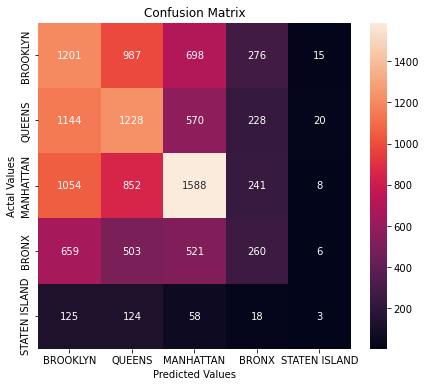

In [163]:
plot_conf_matrix(cm_knn)

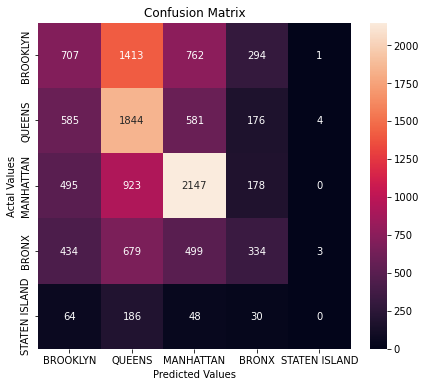

In [164]:
plot_conf_matrix(cm_xgb)

In [166]:
print(metrics.classification_report(y_test, y_pred_xgb, digits=3))

              precision    recall  f1-score   support

           0      0.309     0.223     0.259      3177
           1      0.366     0.578     0.448      3190
           2      0.532     0.574     0.552      3743
           3      0.330     0.171     0.226      1949
           4      0.000     0.000     0.000       328

    accuracy                          0.406     12387
   macro avg      0.307     0.309     0.297     12387
weighted avg      0.386     0.406     0.384     12387



In [167]:
print(metrics.classification_report(y_test, y_pred_, digits=3))

              precision    recall  f1-score   support

           0      0.287     0.378     0.326      3177
           1      0.332     0.385     0.357      3190
           2      0.462     0.424     0.442      3743
           3      0.254     0.133     0.175      1949
           4      0.058     0.009     0.016       328

    accuracy                          0.346     12387
   macro avg      0.279     0.266     0.263     12387
weighted avg      0.340     0.346     0.337     12387



In [146]:
#df_trial = df4

In [147]:
#injured_per_borough = df_trial.groupby(['BOROUGH']).agg({'NUMBER OF PERSONS INJURED':sum})
#injured_per_borough

In [148]:
#no_of_days = df_trial['CRASH DATE'].nunique()
#no_of_days

In [149]:
#type(injured_per_borough)